# AliCPT data challenge

- 'C' coord
- Ali (microK), Plk (microK), WMAP (K)

In [1]:
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gsp
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

### AliCPT 95GHz

fsky 0.09095144271850586


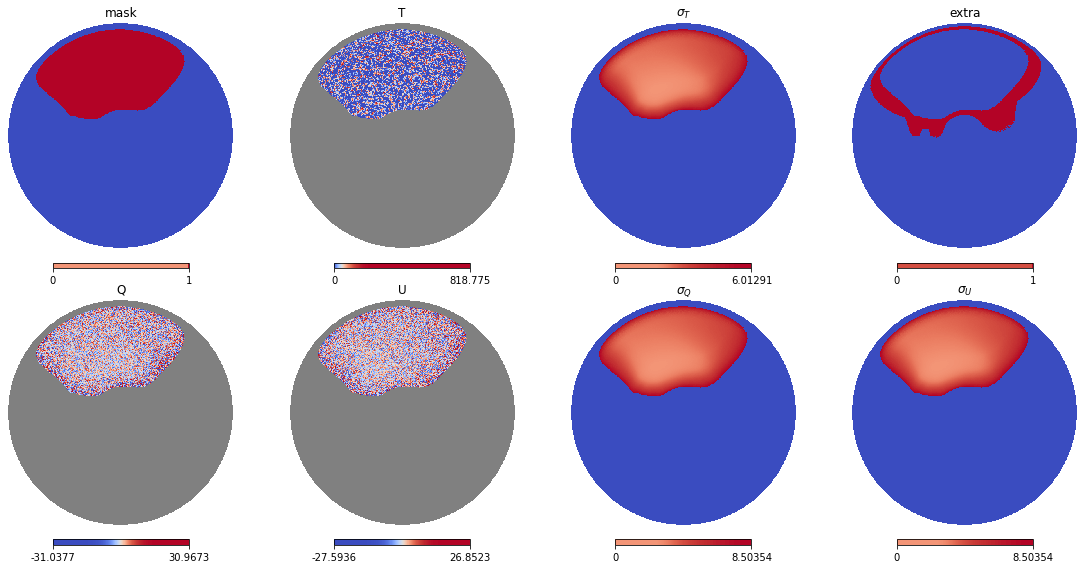

In [2]:
extra_ratio = 0.1

# T,Q,U, microK
m = hp.read_map('./AliCPT/IQU_BOTH_95_0.fits',field=[0,1,2],dtype=np.float32,verbose=0)
# binary mask
mask = hp.read_map('./AliCPT/BINARYMASK.fits',dtype=int,verbose=0)
# sigmaT,sigmaQ,sigmaU, microK
noise = hp.read_map('./AliCPT/NOISE_95.fits',field=[0,1,2],dtype=np.float32,verbose=0)
# hit map
hit = hp.read_map('./AliCPT/HITMAP.fits',dtype=np.int,verbose=0)
extra = hit>0  # extra mask
mask[hit<extra_ratio*max(hit)] = 0
extra[hit>extra_ratio*max(hit)] = 0

print('fsky',sum(mask)/len(mask))

m[:,mask<1] = hp.UNSEEN
noise[:,mask<1] = 0.

fig = plt.figure(figsize=(20,10))

gs = gsp.GridSpec(10,20)

fig.add_subplot(gs[0:5, 0:5])
hp.orthview(mask,rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=0,max=1,title='mask',hold=1)
fig.add_subplot(gs[0:5, 5:10])
hp.orthview(m[0],rot=[0,90],norm='hist',cmap='coolwarm',half_sky=1,min=0,title='T',hold=1)
fig.add_subplot(gs[5:10, 0:5])
hp.orthview(m[1],rot=[0,90],norm='hist',cmap='coolwarm',half_sky=1,title='Q',hold=1)
fig.add_subplot(gs[5:10, 5:10])
hp.orthview(m[2],rot=[0,90],norm='hist',cmap='coolwarm',half_sky=1,title='U',hold=1)

fig.add_subplot(gs[0:5, 15:20])
hp.orthview(extra,rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=0,max=1,title='extra',hold=1)
fig.add_subplot(gs[0:5, 10:15])
hp.orthview(noise[0],rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=0,title=r'$\sigma_T$',hold=1)
fig.add_subplot(gs[5:10, 10:15])
hp.orthview(noise[1],rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=0,title=r'$\sigma_Q$',hold=1)
fig.add_subplot(gs[5:10, 15:20])
hp.orthview(noise[2],rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=0,title=r'$\sigma_U$',hold=1)

CPU times: user 13min 3s, sys: 3.75 s, total: 13min 6s
Wall time: 1min 43s


Text(0, 0.5, '$D_\\ell$')

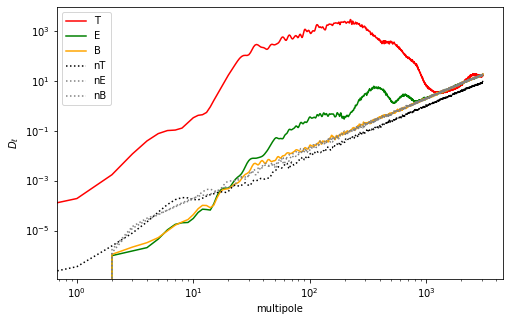

In [3]:
%%time
m[:,mask<1] = 0.
noise_samp = np.random.normal(0,1,size=m.shape)*noise
cl = hp.anafast(m)
ell = np.arange(cl.shape[1])
ncl = hp.anafast(noise_samp)

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(ell,ell*(ell+1)*cl[0],color='red',label='T')
ax.plot(ell,ell*(ell+1)*cl[1],color='green',label='E')
ax.plot(ell,ell*(ell+1)*cl[2],color='orange',label='B')

ax.plot(ell,ell*(ell+1)*ncl[0],color='k',linestyle=':',label='nT')
ax.plot(ell,ell*(ell+1)*ncl[1],color='grey',linestyle=':',label='nE')
ax.plot(ell,ell*(ell+1)*ncl[2],color='grey',linestyle=':',label='nB')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=2)
ax.set_xlabel('multipole')
ax.set_ylabel(r'$D_\ell$')

### AliCPT 150GHz

fsky 0.09095144271850586


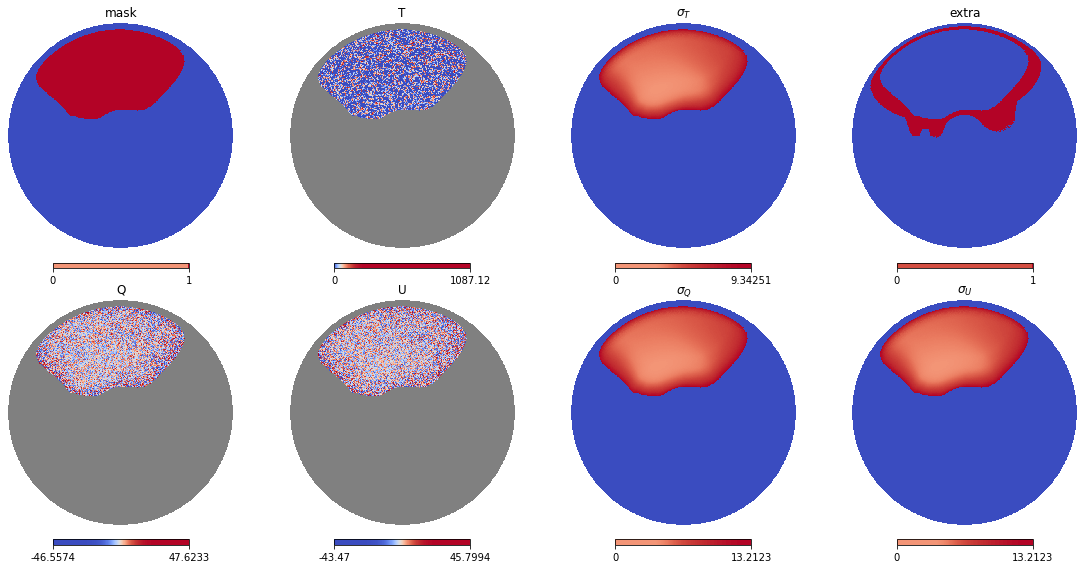

In [4]:
extra_ratio = 0.1

# T,Q,U, microK
m = hp.read_map('./AliCPT/IQU_BOTH_150_0.fits',field=[0,1,2],dtype=np.float32,verbose=0)
# binary mask
mask = hp.read_map('./AliCPT/BINARYMASK.fits',dtype=int,verbose=0)
# sigmaT,sigmaQ,sigmaU, microK
noise = hp.read_map('./AliCPT/NOISE_150.fits',field=[0,1,2],dtype=np.float32,verbose=0)
# hit map
hit = hp.read_map('./AliCPT/HITMAP.fits',dtype=np.int,verbose=0)
extra = hit>0  # extra mask
mask[hit<extra_ratio*max(hit)] = 0
extra[hit>extra_ratio*max(hit)] = 0

print('fsky',sum(mask)/len(mask))

m[:,mask<1] = hp.UNSEEN
noise[:,mask<1] = 0.

fig = plt.figure(figsize=(20,10))

gs = gsp.GridSpec(10,20)

fig.add_subplot(gs[0:5, 0:5])
hp.orthview(mask,rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=0,max=1,title='mask',hold=1)
fig.add_subplot(gs[0:5, 5:10])
hp.orthview(m[0],rot=[0,90],norm='hist',cmap='coolwarm',half_sky=1,min=0,title='T',hold=1)
fig.add_subplot(gs[5:10, 0:5])
hp.orthview(m[1],rot=[0,90],norm='hist',cmap='coolwarm',half_sky=1,title='Q',hold=1)
fig.add_subplot(gs[5:10, 5:10])
hp.orthview(m[2],rot=[0,90],norm='hist',cmap='coolwarm',half_sky=1,title='U',hold=1)

fig.add_subplot(gs[0:5, 15:20])
hp.orthview(extra,rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=0,max=1,title='extra',hold=1)
fig.add_subplot(gs[0:5, 10:15])
hp.orthview(noise[0],rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=0,title=r'$\sigma_T$',hold=1)
fig.add_subplot(gs[5:10, 10:15])
hp.orthview(noise[1],rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=0,title=r'$\sigma_Q$',hold=1)
fig.add_subplot(gs[5:10, 15:20])
hp.orthview(noise[2],rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=0,title=r'$\sigma_U$',hold=1)

CPU times: user 13min 27s, sys: 3.54 s, total: 13min 31s
Wall time: 1min 46s


Text(0, 0.5, '$D_\\ell$')

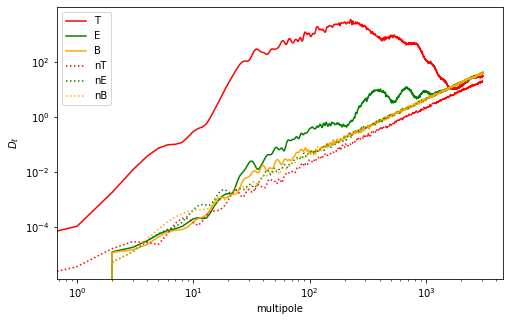

In [5]:
%%time
m[:,mask<1] = 0.
noise_samp = np.random.normal(0,1,size=m.shape)*noise
cl = hp.anafast(m)
ell = np.arange(cl.shape[1])
ncl = hp.anafast(noise_samp)

fig,ax = plt.subplots(figsize=(8,5))
ax.plot(ell,ell*(ell+1)*cl[0],color='red',label='T')
ax.plot(ell,ell*(ell+1)*cl[1],color='green',label='E')
ax.plot(ell,ell*(ell+1)*cl[2],color='orange',label='B')

ax.plot(ell,ell*(ell+1)*ncl[0],color='red',linestyle=':',label='nT')
ax.plot(ell,ell*(ell+1)*ncl[1],color='green',linestyle=':',label='nE')
ax.plot(ell,ell*(ell+1)*ncl[2],color='orange',linestyle=':',label='nB')

ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc=2)
ax.set_xlabel('multipole')
ax.set_ylabel(r'$D_\ell$')

### Planck HFI

In [6]:
plk_freqs=[100,143,217,353]

plk_templates=dict()
mask = hp.read_map('./AliCPT/BINARYMASK.fits',dtype=int,verbose=0)

for freq in plk_freqs:
    m = hp.read_map('./HFI_detector_F'+str(freq)+'/IQU_BOTH_HFI_detector_F'+str(freq)+'.fits',
                    field=[0,1,2],dtype=np.float32,verbose=0)
    m[:,mask<1] = hp.UNSEEN
    plk_templates[freq] = m

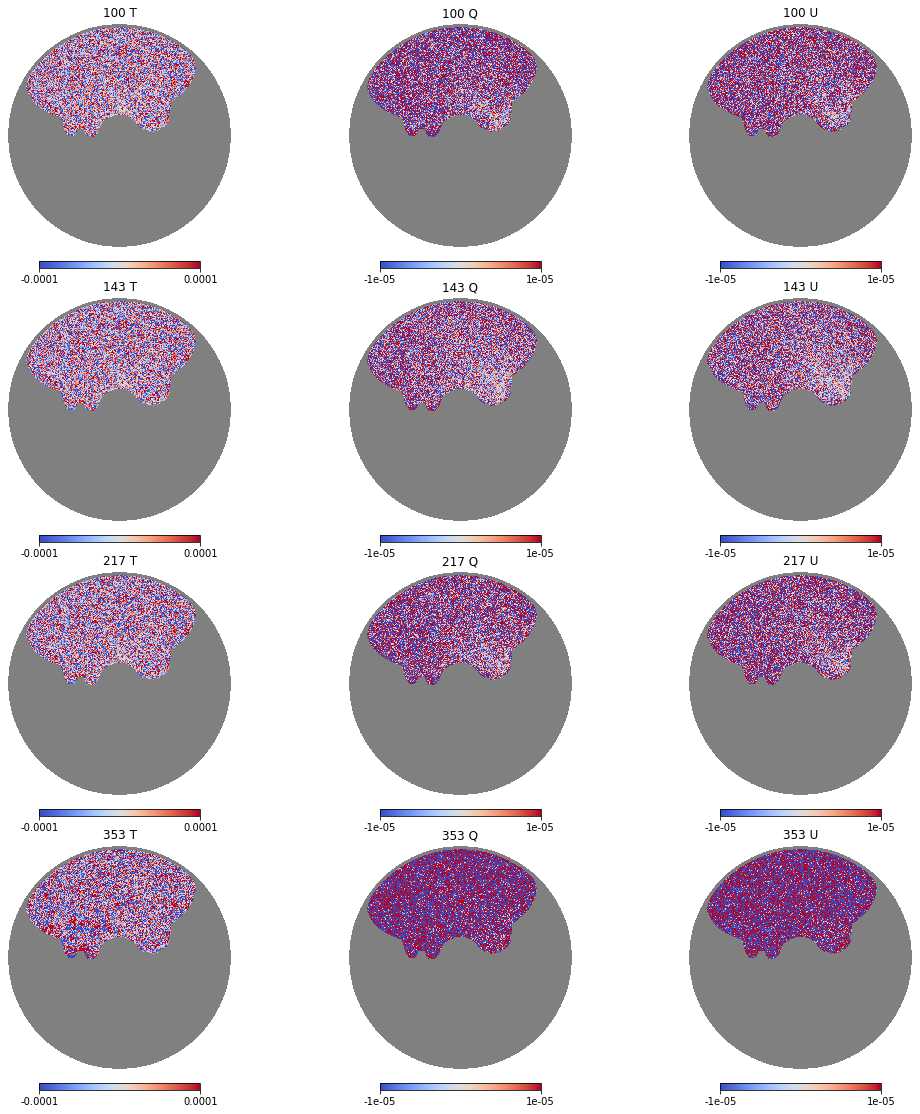

In [7]:
fig = plt.figure(figsize=(20,20))

gs = gsp.GridSpec(20,10)

for i in range(len(plk_freqs)):
    fig.add_subplot(gs[0+5*i:5+5*i, 0:3])
    hp.orthview(plk_templates[plk_freqs[i]][0],
                rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=-1e-4,max=1e-4,
                title=str(plk_freqs[i])+' T',hold=1)
    fig.add_subplot(gs[0+5*i:5+5*i, 3:6])
    hp.orthview(plk_templates[plk_freqs[i]][1],
                rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=-1e-5,max=1e-5,
                title=str(plk_freqs[i])+' Q',hold=1)
    fig.add_subplot(gs[0+5*i:5+5*i, 6:9])
    hp.orthview(plk_templates[plk_freqs[i]][2],
                rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=-1e-5,max=1e-5,
                title=str(plk_freqs[i])+' U',hold=1)

### WMAP K

In [8]:
mask = hp.read_map('./AliCPT/BINARYMASK.fits',dtype=int,verbose=0)

m = hp.read_map('./WMAP_K/IQU_BOTH_WMAP_K.fits',
                field=[0,1,2],dtype=np.float32,verbose=0)
m[:,mask<1] = hp.UNSEEN

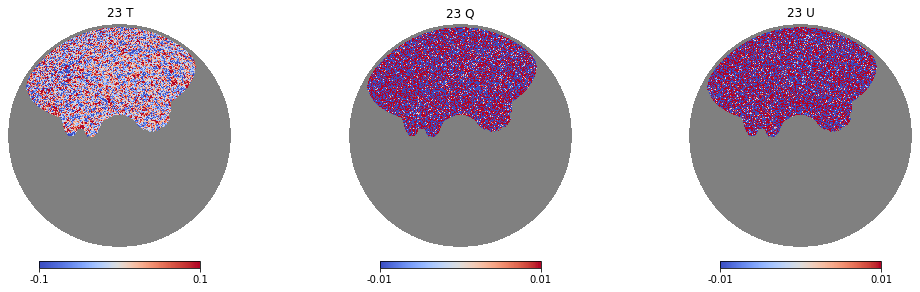

In [9]:
fig = plt.figure(figsize=(20,20))

gs = gsp.GridSpec(20,10)


fig.add_subplot(gs[0:5, 0:3])
hp.orthview(m[0],
            rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=-1e-1,max=1e-1,
            title='23 T',hold=1)
fig.add_subplot(gs[0:5, 3:6])
hp.orthview(m[1],
            rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=-1e-2,max=1e-2,
            title='23 Q',hold=1)
fig.add_subplot(gs[0:5, 6:9])
hp.orthview(m[2],
            rot=[0,90],half_sky=1,cmap='coolwarm',norm='hist',min=-1e-2,max=1e-2,
            title='23 U',hold=1)

end